/home/codacker/.virtualenvs/fuzzy/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/codacker/.virtualenvs/fuzzy/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/codacker/.virtualenvs/fuzzy/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


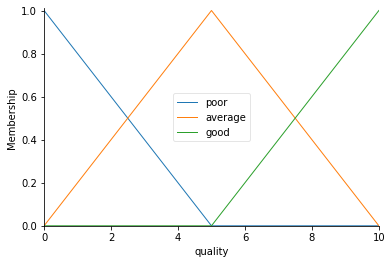

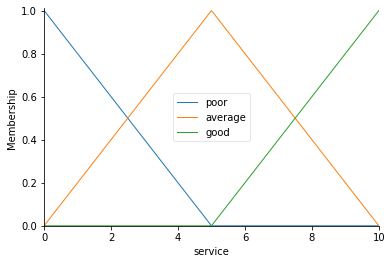

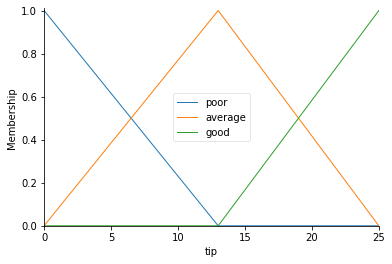

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# antecedents and consequent objects
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# auto membership functions for quality and service
quality.automf(3)
service.automf(3)

# manual membership functions for tip
tip["poor"] = fuzz.trimf(tip.universe, [0, 0, 13])
tip["average"] = fuzz.trimf(tip.universe, [0, 13, 25])
tip["good"] = fuzz.trimf(tip.universe, [13, 25, 25])

quality.view()
service.view()
tip.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

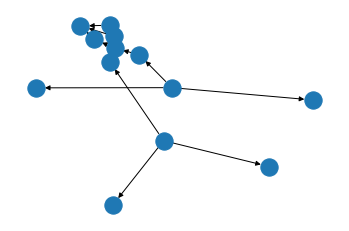

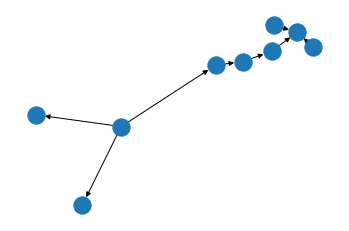

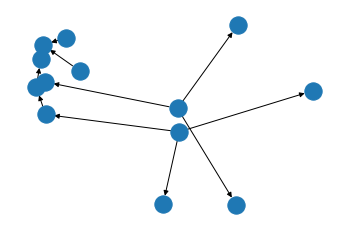

In [2]:
# creating fuzzy rules
rule1 = ctrl.Rule(quality["poor"] | service["poor"], tip["poor"], "quality(poor) | service (poor) -> tip (poor)")
rule2 = ctrl.Rule(quality["average"], tip["average"], "quality(average) -> tip (poor)")
rule3 = ctrl.Rule(quality["good"] | service["good"], tip["good"], "quality(good) | service (good) -> tip (good)")
rule1.view()
rule2.view()
rule3.view()

In [3]:
# creating control system and control system simulator
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping_sim = ctrl.ControlSystemSimulation(tipping_ctrl)

16.806387225548903


/home/codacker/.virtualenvs/fuzzy/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


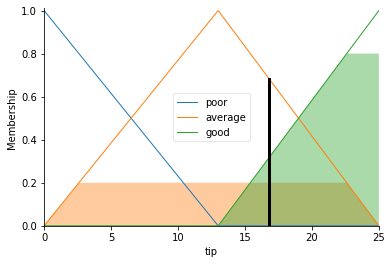

In [4]:
tipping_sim.input["quality"] = 9
tipping_sim.input["service"] = 9
tipping_sim.compute()
print(tipping_sim.output["tip"])
tip.view(sim=tipping_sim)